Syed Dawood Ali - C00302916


In [14]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


### Loading the dataset
I will use the Apple Stock Data for this notebook

In [15]:
Stock = pd.read_csv('/content/AAPL (1).csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


Remove some of the columns which are not required

In [16]:
df_Stock = df_Stock.drop(columns='Date_col')

### Test Train Set

Close_forecast is the column that we are trying to predict here which is the price for the next day.

In [17]:
def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']


    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [18]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)


### Prediction using Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [20]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 8.63720651e-03  1.86051924e-01  1.55487061e-01  1.12263757e+00
  1.27286976e-10  6.75244700e-03  1.40229152e-01  1.13219364e-01
  4.25627561e-02  8.96348479e-02  1.01914952e-01  5.94183536e-02
  7.95194233e-02  7.10399945e-02  2.71425000e-01  1.26724258e-01
  8.79333221e-02 -5.87980378e-03 -3.31643390e-01 -3.31643390e-01
 -3.31643390e-01 -3.31643390e-01 -3.31643390e-01  1.88650006e+00
 -1.27270717e+00 -1.65042222e-01 -4.36658326e-04 -3.21581043e-12
 -5.07434282e-03  9.02936549e-03  5.78316988e-04  5.78316984e-04
 -5.57918089e-01 -2.02305062e-10  4.18931556e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165520e-03  2.15420350e-01
  1.13979655e-01 -2.41954674e-01  7.63050309e-02  3.73276597e-01
 -1.66533454e-16 -5.60843989e-02  4.08788806e-02  5.13473863e-01
 -2.94431539e-02 -8.41335081e-02  5.10939135e-02 -8.14435710e-03
 -1.95035197e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967545e-03 -3.89778364e-03 -1.62174814e-03  1.44436900e-03
  2.83

### Evaluation

In [21]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9994516474373267


In [22]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Predict for the test dataset

In [23]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

We have a decent Mean Absolute error but not great. I will create further tuned models in later notebooks. This is just to get you started with the dataset.

In [24]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

<ipython-input-24-eb2d0977aa50>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')


,Date,Actual,Predicted
0,2018-11-01,202.30,216.289778
1,2018-11-02,196.56,201.470182
2,2018-11-05,198.68,195.948933
3,2018-11-06,204.71,199.043601
4,2018-11-07,204.00,204.193666
...,...,...,...
368,2020-04-22,273.79,275.751755
369,2020-04-23,281.70,274.020243
370,2020-04-24,281.90,280.710045
371,2020-04-27,277.33,280.543603


### Plot Predicted vs Actual Prices on Time Series plot

<Axes: >

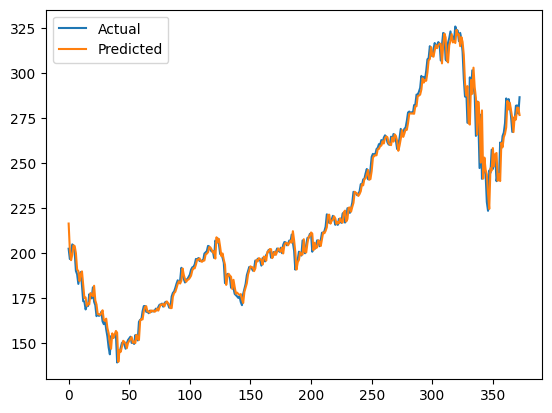

In [25]:
df_pred[['Actual', 'Predicted']].plot()

Overall the Predictions looks good for the test data!